# CS110: Assignment 2
## LBA: A day in life of a Minervan Part 1


## Question 1

A. Prepare a table containing all the activities that you plan to do in the city of your rotation, with a
short, compelling justification of why they are interesting. The table needs to include:
● at least 5 activities, each of which can be subdivided into 3 to k sub-tasks.
○ for example, if you need to go grocery shopping, you may need to collect bags
from your room to bring the shopping, leave the residence, and take a bus to the
shopping location.

● at least 3 culturally specific to your rotation city (not routine nor academic).
○ Please refer to the Student Life City Experiences guide for a list of activities that
are recommended for each city.


In [ ]:
import pandas as pd
from random import randint

#Giving titles to columns
column_titles=['Activity','Task ID','Task descriptions', 'Task duration in minutes', 'Dependencies', 'Strict starting time']
#Adding the tasks to the data list, where each list is a task
tasks=[['Dongdaemun','1','Collect some bags and a wallet',10,None,None],
      ['Dongdaemun','2','Get to the market by bus',20,None,None],
      ['Dongdaemun','3','Walk around the market to buy good clothes',60,'2',None],
      ['BBQ','4','Gather a number of friends who want to go to bbq place',10,None,None],
      ['BBQ','5','Get to the restaurant',10,None,'11:00 AM'],
      ['BBQ','6','Enjoy the meat',60,'5','11:30 AM'],
      ['Namsan','7','Find the route to the mountain',10,None,None],
      ['Namsan','8','Take a bus to the mountain',10,'7',None],
      ['Namsan','9','Spend time in the mountain eating snakcs',60,['7','8'],None],
      ['PUBG','10','Download PUBG mobile',10,None,None],
      ['PUBG','11','Make online friends in PUBG',20,None,None],
      ['PUBG','12','Play PUBG mobile',40,None,None],
      ['Home Dinner','13','Invite my friends to my house',10,None,None],
      ['Home Dinner','14','Take a bus to my house',20,None,'4:00 PM'],
      ['Home Dinner','15','Enjoy dinner with my family and friends',60,None,'5:30 PM'], 
      ]


#Creating a dataframe of our tasks
df = pd.DataFrame(columns=column_titles, data=tasks)

    
df

Activity Task ID                                  Task descriptions  \
0    Dongdaemun       1                     Collect some bags and a wallet   
1    Dongdaemun       2                           Get to the market by bus   
2    Dongdaemun       3         Walk around the market to buy good clothes   
3           BBQ       4  Gather a number of friends who want to go to b...   
4           BBQ       5                              Get to the restaurant   
5           BBQ       6                                     Enjoy the meat   
6        Namsan       7                     Find the route to the mountain   
7        Namsan       8                         Take a bus to the mountain   
8        Namsan       9           Spend time in the mountain eating snakcs   
9          PUBG      10                               Download PUBG mobile   
10         PUBG      11                        Make online friends in PUBG   
11         PUBG      12                                   Play PUBG mobile   
12  Home Dinner      13                      Invite my friends to my house   
13  Home Dinner      14                             Take a bus to my house   
14  Home Dinner      15            Enjoy dinner with my family and friends   

    Task duration in minutes Dependencies Strict starting time  
0                         10         None                 None  
1                         20         None                 None  
2                         60            2                 None  
3                         10         None                 None  
4                         10         None             11:00 AM  
5                         60            5             11:30 AM  
6                         10         None                 None  
7                         10            7                 None  
8                         60       [7, 8]                 None  
9                         10         None                 None  
10                        20         None                 None  
11                        40         None                 None  
12                        10         None                 None  
13                        20         None              4:00 PM  
14                        60         None              5:30 PM

Take my friends to my house: this is an interesting activity because it’s only possible to have my friends in my house when the rotation city is Seoul. 

Shop clothes in Dongdaemun market: This is an interesting activity because Dongdaemun is a historical place in Korea. They sell different kinds of clothes at a very cheap price. 

Go to a Korean barbecue place: This is an interesting activity because Korean barbecue is a part of Korea’s unique culture, where everyone gathers around a grill in the middle. Sharing food.

Climb Namsan mountain: This is the most iconic mountain in Seoul

Playing Player Unkonwn's Battle Ground (PUBG): Due to Covid-19, it is difficult to make local friends off-line, so it is a good idea to go online and play one of the most popular game in korea and make local friends.


B. How will you store information about these activities and sub-tasks? 

I will store information using Class Task, which will allow creating attributes about the sub-tasks. The attributes include task ID, task descriptions, duration in minutes, dependencies, and strict starting time. Dependencies refer to the tasks that need to be done before executing a task. Strict starting time exists when a task has to start at the time. For instance, my family always starts eating dinner at 5:30 PM, so the eating dinner must start at 5:30 PM. 
Each of the tasks will be an instance that has all of these attributes. 

C. Describe how your scheduler will work, with an emphasis on why a priority queue is a
well-suited data structure to handle the prioritization of tasks, and how you have defined and
computed the priority value of each task and/or sub-task.
Explain your answers as clearly as you can.

I craeted three Classes: Max heapq, Task, and TaskScheduler. Max heapq implements properties and methods that support a max priority queue data structure. The priority queue will be based on the values of priority values of each subtasks, where subtasks with the highest priority value will be at the root of the priority queue. It will have all the characteristics of a max heap data structure, where parent node will always be bigger than its child nodes. Class Task will store all the information or attributes of the tasks and subtasks. TaskScheduler holds methods that can create a scheduler given inputs. Most of the methods are from CS 110 Session 10: heaps and priority queue, but I heavily revised method run_task_scheduler so that it takes account of dependencies and adjust priority values when necessary. To be specific, it sets the priority value of a task to 99 if the difference between its strict starting time and current time is less than the duration of the current root of the priority queue. The task with strict time constraint will now have the highest priority value, and the method executes build_max_heap that will heapify the whole heap, placing the updated task to the root. 

Priority queue is a well-suited data structure to prioritize tasks because root of the priority queue will always hold a task with the maximum priority value. That is exactly what a scheduler requires: it needs to decide which task should be executed first. Priority queue is also very useful because heappush and heapify makes efficient insertion and organization of the heap. Thus, with simple modification, adding a new task or updating the priority value in the middle is possible without destroying the sorting. 

I created a function priority_generator that provides the initial priority values based on the number of dependencies it has, number of other tasks dependent on the task, and duration of the task as shown below. To prevent tasks with strict starting time running before its start time, the generator sets their initial priority values to be 0. The priority values of these tasks will be set to 99 when no tasks can be done between current time and the strict starting time of a task. 

## Question 2

A. Program an activity scheduler in Python, which receives the list of tasks above as input and
returns a schedule for you to follow. Please refrain from using any external Python library besides pandas, math, and random modules (if you plan on using other libraries, please check
with your course instructor first).

● Make sure your internal representation of tasks has all the fields described in Figure 1, in
addition to the priority value that will characterize each task. Your activity scheduler must
report at the end of every timestep that a task has been completed. The program ends when all
tasks have been completed.

In [ ]:
def left(i):          
        return 2*i + 1  
    
def right(i):       
        return 2*i + 2 
def parent(i):     
        return (i-1)//2
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0
 

     


    def maxk(self):              
        return self.heap[0]     
    
   
    def heappush(self, key):   

        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        #if priority smaller than current key
        if key < self.heap[i]:  
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)]< self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # MAX_HEAPIFY operation for the max priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.       
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    #   Use key_var = heapq_var.heappop() 
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk
    

In [ ]:

a = '5:30 PM'
#converts time in string to minutes
def strip(string):
    tokens = string.split(':')
    tokens += tokens.pop().split(' ')
    if tokens[-1].upper() == 'AM':
        time = int(tokens[0]) * 60 + int(tokens[1])
    else:
        time = 720 + int(tokens[0]) * 60 + int(tokens[1])
    return time

strip(a)

1050

In [ ]:
# Without multi tasking
class Task:
    """
    - activity: Name of the activity
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - priority: Priority level of a task (ranging from 0 to 100) 
    - dependencies: tasks that need to be completed before the starting the task
    - time constraints: 
    - status: Current status of the task
   
    """
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,priority,strict_starting_time=None,status="N"):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.strict_starting_time = strict_starting_time
        self.status=status
        
    def __repr__(self):
        
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n \tPriority:{self.priority}\n \tStrict_starting_time:{self.strict_starting_time}\n\tStatus: {self.status}"

    def __lt__(self, other):
        if isinstance(other,Task):
            return self.priority < other.priority
        return self.priority < other 
    
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()
        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)
        
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                # Push task into the priority queue 
                self.priority_queue.heappush(task)
                
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
   
    #converts time in string to minutes
    def strip(self, string_time):
        tokens = string_time.split(':')
        tokens += tokens.pop().split(' ')
        if tokens[-1].upper() == 'AM':
            time = int(tokens[0]) * 60 + int(tokens[1])
        else:
            time = 720 + int(tokens[0]) * 60 + int(tokens[1])
        return time
    
    #starts at 8:00
    def run_task_scheduler(self, starting_time = 480):
        time_constraints_lst = sorted([self.strip(task.strict_starting_time) for task in self.tasks if task.strict_starting_time is not None])
        
          
        current_time = starting_time
        i = 0
        while self.check_unscheduled_tasks() or self.priority_queue.heap:
            #STEPs 1 and 2: Extract tasks ready to execute (those without dependencies) and push them into the priority queue
            self.get_tasks_ready()
            if len(self.priority_queue.heap) > 0 :  #STEP 3: Check for tasks in the priority queue.

# STEP 4: get the tasks on top of the priority queue (1 line of code required)

                task = self.priority_queue.heap[0]
                if i<len(time_constraints_lst):
            
                    if time_constraints_lst[i]-current_time < task.duration:
                        current_time += time_constraints_lst[i]-current_time
                        for j in range(len(self.tasks)):
                            if self.tasks[j].strict_starting_time is not None:

                                if strip(self.tasks[j].strict_starting_time) == time_constraints_lst[i]:

                                    
                                    self.tasks[j].priority = 99
                                    #build_max_heap
                                    heap_size = len(self.tasks)
                                    for k in range(len(self.tasks)//2,-1,-1):
                                        self.priority_queue.heapify(k)
                                        
                                    task=self.priority_queue.heappop()
                                    print("The following task has a time constraint.")
                                    i+=1
                                    break
                    else:
                        task = self.priority_queue.heappop()
                else:
                    task = self.priority_queue.heappop()
                    
                    
                
                print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                current_time += task.duration            
                print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                ####### if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list (1 line of code required)

                self.remove_dependency(task.id)
                task.status = self.COMPLETED
        total_time = current_time - starting_time
        print(f"Congrats! Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")

In [ ]:

def priority_generator(i):
    #Checks the tasks' dependencies and adds 30 priority value 
    #because it is likely to be the first or second step of the activity
    if df['Dependencies'][i]==None:
        df['Priority'][i]+=30
        
    #If it has, +10 to the priority of the task that it is 
    #dependent upon will be added
    if df['Dependencies'][i]!=None:
        for j in range(len(df['Dependencies'][i])):
            df.loc[df['Task ID']==df['Dependencies'][i][j], ['Priority']]+=10
    
    if df['Task duration in minutes'][i]>120:
        df['Priority'][i]+=3
    #If it's a medium-long task, +2 added to priority
    elif ((df['Task duration in minutes'][i]<=120) & (df['Task duration in minutes'][i]>=60)):
        df['Priority'][i]+=2
    #If it's a short task, +1 added to priority
    elif ((df['Task duration in minutes'][i]<60) & (df['Task duration in minutes'][i]>=15)):
        df['Priority'][i]+=1
    if df['Strict starting time'][i]!=None:
        df['Priority'][i]=0
    
    


#Giving titles to columns
column_titles=['Activity','Task ID','Task descriptions', 'Task duration in minutes', 'Dependencies', 'Strict starting time','Priority']
#Adding the tasks to the data list, where each list is a task
tasks=[['Dongdaemun','1','Collect some bags and a wallet',10,None,None,0],
      ['Dongdaemun','2','Get to the market by bus',20,'1',None,0],
      ['Dongdaemun','3','Walk around the market to buy good clothes',60,['1','2'],None,0],
      ['BBQ','4','Gather a number of friends who want to go to bbq place',10,None,None,0],
      ['BBQ','5','Get to the restaurant',10,None,'11:00 AM',0],
      ['BBQ','6','Enjoy the meat',70,'5','11:30 AM',0],
      ['Namsan','7','Find the route to the mountain',15,None,None,0],
      ['Namsan','8','Take a bus to the mountain',10,'7',None,0],
      ['Namsan','9','Spend time in the mountain',90,['7','8'],None,0],
      ['PUBG','10','Download PUBG mobile',10,None,None,0],
      ['PUBG','11','Make online friends in PUBG',20,None,None,0],
      ['PUBG','12','Play PUBG mobile',60,None,['10','11'],0],
      ['Home Dinner','13','Invite my friends to my house',10,None,None,0],
      ['Home Dinner','14','Take a bus to my house',20,None,'4:00 PM',0],
      ['Home Dinner','15','Enjoy dinner with my family and friends',60,None,'5:30 PM',0], 
      ]


#Creating a dataframe of our tasks
df = pd.DataFrame(columns=column_titles, data=tasks)

    
df
#Running the priority_evaluation functions on the entire dataframe        
for i in range(len(df)):
    priority_generator(i)
df

<ipython-input-5-831748d9fda2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Priority'][i]+=30
<ipython-input-5-831748d9fda2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Priority'][i]+=1
<ipython-input-5-831748d9fda2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Priority'][i]+=2
<ipython-input-5-831748d9fda2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

Activity Task ID                                  Task descriptions  \
0    Dongdaemun       1                     Collect some bags and a wallet   
1    Dongdaemun       2                           Get to the market by bus   
2    Dongdaemun       3         Walk around the market to buy good clothes   
3           BBQ       4  Gather a number of friends who want to go to b...   
4           BBQ       5                              Get to the restaurant   
5           BBQ       6                                     Enjoy the meat   
6        Namsan       7                     Find the route to the mountain   
7        Namsan       8                         Take a bus to the mountain   
8        Namsan       9                         Spend time in the mountain   
9          PUBG      10                               Download PUBG mobile   
10         PUBG      11                        Make online friends in PUBG   
11         PUBG      12                                   Play PUBG mobile   
12  Home Dinner      13                      Invite my friends to my house   
13  Home Dinner      14                             Take a bus to my house   
14  Home Dinner      15            Enjoy dinner with my family and friends   

    Task duration in minutes Dependencies Strict starting time  Priority  
0                         10         None                 None        50  
1                         20            1                 None        11  
2                         60       [1, 2]                 None         2  
3                         10         None                 None        30  
4                         10         None             11:00 AM        10  
5                         70            5             11:30 AM         0  
6                         15         None                 None        51  
7                         10            7                 None        10  
8                         90       [7, 8]                 None         2  
9                         10         None                 None        30  
10                        20         None                 None        31  
11                        60         None             [10, 11]         0  
12                        10         None                 None        30  
13                        20         None              4:00 PM         0  
14                        60         None              5:30 PM         0

B. In addition to the actual scheduler, provide at least one simple example to demonstrate how
your scheduler prioritizes tasks based on their priority value.

Below is an exmaple that demonstrate how my scheduler prioritizes tasks based on their priority value. Among the tasks that currently does not have a dependency, the order of the task execution will generally be determined depending on the initial priority value it received from the priority calculation. For instance, among all the tasks with no dependencies initially (Task 1,4,5,6,7,10,13,14,15), Task 7 has the highest priority value (51), so task 7 will run first, followed by task 1 (50). 

However, tasks with time constraints will have the highest value when the difference beween its strict starting time and current time is less then the duration of the task with highest initial priority value among tasks not completed. For instance, task 5 requires me to get to the barbecue restaurant by 11:00 AM, before the restaurant gets crowed by people. The scheduler places task 5 at 11:00 AM even though it has low initial priority value because it increases the priority value when the current time gets close to 11:00 AM.

In [ ]:
tasks = [
    Task(1, 'Collect some bags and a wallet', 20, [], 50), 
    Task(2, 'Get to the market by bus', 40, [1], 11), 
    Task(3, 'Walk around the market to buy good clothes', 80, [1,2], 2), 
    Task(4, 'Gather a number of friends who want to go to bbq place', 10, [], 30), 
    Task(5, 'Get to the restaurant', 30, [], 0,strict_starting_time='11:00 AM'), 
    Task(6, 'Enjoy the meat', 70, [], 0,strict_starting_time='11:30 AM'), 
    Task(7, 'Find the route to the mountain', 15, [], 51),
    Task(8, 'Take a bus to the mountain', 50, [7], 10),
    Task(9, 'Spend time in the mountain', 90, [7,8], 2),
    Task(10, 'Download PUBG mobile', 10, [], 30),
    Task(11, 'Make online friends in PUBG', 30, [10], 31),
    Task(12, 'Play PUBG mobile', 90, [10,11], 0),
    Task(13, 'Invite my friends to my house', 20, [], 30),
    Task(14, 'Take a bus to my house with friends', 60, [], 0,strict_starting_time='4:00 PM'),
    Task(15, 'Enjoy dinner with my family and friends', 60, [], 0,strict_starting_time='5:30 PM')
]
task_scheduler = TaskScheduler(tasks)
task_scheduler.print_self()

Input List of Tasks
Collect some bags and a wallet - id: 1
 	Duration:20
	Depends on: []
 	Priority:50
 	Strict_starting_time:None
	Status: N
Get to the market by bus - id: 2
 	Duration:40
	Depends on: [1]
 	Priority:11
 	Strict_starting_time:None
	Status: N
Walk around the market to buy good clothes - id: 3
 	Duration:80
	Depends on: [1, 2]
 	Priority:2
 	Strict_starting_time:None
	Status: N
Gather a number of friends who want to go to bbq place - id: 4
 	Duration:10
	Depends on: []
 	Priority:30
 	Strict_starting_time:None
	Status: N
Get to the restaurant - id: 5
 	Duration:30
	Depends on: []
 	Priority:0
 	Strict_starting_time:11:00 AM
	Status: N
Enjoy the meat - id: 6
 	Duration:70
	Depends on: []
 	Priority:0
 	Strict_starting_time:11:30 AM
	Status: N
Find the route to the mountain - id: 7
 	Duration:15
	Depends on: []
 	Priority:51
 	Strict_starting_time:None
	Status: N
Take a bus to the mountain - id: 8
 	Duration:50
	Depends on: [7]
 	Priority:10
 	Strict_starting_time:None
	St

In [ ]:
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 7 that takes 15 mins
✅ Completed Task 7 - 'Find the route to the mountain' at time 8h15

⏰Simple Scheduler at time 8h15 started executing task 1 that takes 20 mins
✅ Completed Task 1 - 'Collect some bags and a wallet' at time 8h35

⏰Simple Scheduler at time 8h35 started executing task 4 that takes 10 mins
✅ Completed Task 4 - 'Gather a number of friends who want to go to bbq place' at time 8h45

⏰Simple Scheduler at time 8h45 started executing task 10 that takes 10 mins
✅ Completed Task 10 - 'Download PUBG mobile' at time 8h55

⏰Simple Scheduler at time 8h55 started executing task 11 that takes 30 mins
✅ Completed Task 11 - 'Make online friends in PUBG' at time 9h25

⏰Simple Scheduler at time 9h25 started executing task 13 that takes 20 mins
✅ Completed Task 13 - 'Invite my friends to my house' at time 9h45

⏰Simple Scheduler at time 9h45 started executing task 2 that takes 40 mins
✅ Completed Task 2 - 'Get to the market by bus' at 

## Question 3

A. Describe as clearly as you can any changes you will need to make to the first version of the
scheduler to include multi-tasking activities.

First of all, I would need to add multi_tasking as an attribute by adding it to __init__ and __repr__. The attribute will receive a tuple as its input, where the first item is a boolean (True when multi tasking is possible and False otherwise) and the second item is id of a task it can be multi tasked (integer). In addition, I should add a condition inside run_task_scheduler that checks if a popped task can be multi tasked. If it can be multi tasked, it checks the ID of the task it can be multitasked with. Then it should compare their duration and raise the priority value of the multi taskable task if it has a longer duration. Then, it should heapify and pop the root of the priority queue to execute it. Then, it will run the multi taskable task with a shorter duration with the same procedure. Finally, it should subtract the duration of the shorter task from the current time because the shorter task should have been executed at the same time during the execution of the longer task. 

B. Describe how constraints in the scheduling process are handled by a priority queue.

Constraint 1. Time constraint.
Some tasks must start at certain time of the day, which is a constraint. Method run_task_scheduler includes a conditional for loop where it sets priority value of a task to be maximum when no task can be done beween the current time and the next time constraint. The priority queue playes an essential role here by bringing up the task with the currently highest priority value to its root by heapifying the node and popping it for execution. 

Constraint 2. Dependencies. 
Some tasks might have high priority value, but it might be dependent on other task(s). The issue is handled making a priority queue that only includes tasks without dependencies. The priority queue allowed categorizing the tasks and finding a task with highest priority value that can be done without completion of another task. 

## Question 4

In [ ]:
#Scheduler with multi tasking
class Task:
    """
    - activity: Name of the activity
    - id: Task Id   
    - description: Short description of the task   
    - duration: Duration in minutes   
    - dependencies: tasks that need to be completed before the starting the task
    - priority: Priority level of a task (ranging from 0 to 100) 
    - multi tasking: Whether a task can be done with other task at the same time. Tuple where multi_tasking[Boolean,int]
    - strict starting time: the time of a task that needs to be done
    - status: Current status of the task
   
    """
    #Initializes an instance of Task
    def __init__(self,task_id,description,duration,dependencies,priority,multi_tasking,strict_starting_time=None,status="N"):
        self.id= task_id
        self.description=description
        self.duration=duration
        self.dependencies=dependencies
        self.priority = priority
        self.can_multi_tasking=multi_tasking[0]
        self.multi_tasking_id=multi_tasking[1]
        self.strict_starting_time = strict_starting_time
        self.status=status
        
    def __repr__(self):
        
        return f"{self.description} - id: {self.id}\n \tDuration:{self.duration}\n\tDepends on: {self.dependencies}\n \tPriority:{self.priority}\n \tMulti tasking with IDs:{self.multi_tasking_id}\n \tStrict_starting_time:{self.strict_starting_time}\n\tStatus: {self.status}"

    def __lt__(self, other):
        if isinstance(other,Task):
            return self.priority < other.priority
        return self.priority < other 
    
class TaskScheduler:
    """
    A Simple Daily Task Scheduler Using Priority Queues
    """
    NOT_STARTED ='N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        self.tasks = tasks
        self.priority_queue = MaxHeapq()

        
    def print_self(self):
        print('Input List of Tasks')
        for t in self.tasks:
            print(t)
            
    def remove_dependency(self, task_id):
        """
        Input: list of tasks and task_id of the task just completed
        Output: lists of tasks with t_id removed
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)
        
    def get_tasks_ready(self):
        """ 
        Implements step 1 of the scheduler
        Input: list of tasks
        Output: list of tasks that are ready to execute (i.e. tasks with no pendending task dependencies)
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED and not task.dependencies: # If task has no dependencies and is not yet in queue
                task.status = self.IN_PRIORITY_QUEUE # Change status of the task
                ######## Push task into the priority queue (1line of code required)
                ####### your code here  
                
                self.priority_queue.heappush(task)
                
#     def task_priority(activities):
#         for task in self.tasks:
#             if task.status == self.NOT_STARTED:
#                 task.status = self.IN_PRIORITY_QUEUE
#             MaxHeapq.heappush(self.priority_queue, task)
    
    def check_unscheduled_tasks(self):
        """
        Input: list of tasks
        Output: boolean (checks the status of all tasks and returns True if at least one task has status = 'N'
        """
        for task in tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False
    
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"
   
    
    def strip(self, string_time):
        tokens = string_time.split(':')
        tokens += tokens.pop().split(' ')
        if tokens[-1].upper() == 'AM':
            time = int(tokens[0]) * 60 + int(tokens[1])
        else:
            time = 720 + int(tokens[0]) * 60 + int(tokens[1])
        return time
    
    #starts at 8:00
    def run_task_scheduler(self, starting_time = 480):
        time_constraints_lst = sorted([self.strip(task.strict_starting_time) for task in self.tasks if task.strict_starting_time is not None])
        
          
        current_time = starting_time
        i = 0
        while self.check_unscheduled_tasks() or self.priority_queue.heap:
    



            #STEPs 1 and 2: Extract tasks ready to execute (those without dependencies) and push them into the priority queue
            self.get_tasks_ready()
            if len(self.priority_queue.heap) > 0 :  #STEP 3: Check for tasks in the priority queue.      
                # STEP 4: get the tasks on top of the priority queue (1 line of code required)

                task = self.priority_queue.heap[0]
                if i<len(time_constraints_lst):
            
                    if time_constraints_lst[i]-current_time < task.duration:
                        current_time += time_constraints_lst[i]-current_time
                        for j in range(len(self.tasks)):
                            if self.tasks[j].strict_starting_time is not None:

                                if strip(self.tasks[j].strict_starting_time) == time_constraints_lst[i]:

                                    
                                    self.tasks[j].priority = 99
                                    #build_max_heap
                                    heap_size = len(self.tasks)
                                    for k in range(len(self.tasks)//2,-1,-1):
                                        self.priority_queue.heapify(k)
                                        
                                    task=self.priority_queue.heappop()
                            
                                    print('Strict time constraint!')
                                    i+=1
                                    break
                    else:
                        task = self.priority_queue.heappop()
                else:
                    task = self.priority_queue.heappop()
                                
                
                #implements multi tasking
                if task.can_multi_tasking is True:
                    for tsk in self.tasks:
                        if tsk.id == task.multi_tasking_id:
                            task.multi_tasking_with_task = tsk
                            
                    if task.duration > task.multi_tasking_with_task.duration:
                        #task.duration -= task.multi_tasking_with_task.duration
                        task.multi_tasking_with_task.priority = 99
                        #build_max_heap
                        heap_size = len(self.tasks)
                        for k in range(len(self.tasks)//2,-1,-1):
                            self.priority_queue.heapify(k)
    
                        task_run_first=self.priority_queue.heappop()
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task_run_first.id} that takes {task_run_first.duration} mins")
                        print('Multi tasking')
                        current_time += task_run_first.duration            
                        print(f"✅ Completed Task {task_run_first.id} - '{task_run_first.description}' at time {self.format_time(current_time)}\n") 
                        
                        self.remove_dependency(task.id)
                        task.status = self.COMPLETED
                        
                        #now run the longer task with just the remaining time
                        current_time -= task_run_first.duration
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                        print('Multi tasking')
                        current_time += task.duration            
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                        # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list (1 line of code required)

                        self.remove_dependency(task_run_first.id)
                        task_run_first.status = self.COMPLETED
                        

                    elif task.duration < task.multi_tasking_with_task.duration:
                        #task.multi_tasking_with_task.duration -= task.duration
                        task.multi_tasking_with_task.priority = 99
                        #build_max_heap
                        heap_size = len(self.tasks)
                        for k in range(len(self.tasks)//2,-1,-1):
                            self.priority_queue.heapify(k)
                            
                        task_run_second=self.priority_queue.heappop()
                        
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task_run_second.id} that takes {task_run_second.duration} mins")
                        
                        current_time += task_run_second.duration            
                        print(f"✅ Completed Task {task_run_second.id} - '{task_run_second.description}' at time {self.format_time(current_time)}\n") 

                        self.remove_dependency(task_run_second.id)
                        task_run_second.status = self.COMPLETED
                        
                        #now run the longer task with just the remaining time
                        current_time -= task.duration
                        print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                        print('Multi tasking')
                        current_time += task.duration            
                        print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                        self.remove_dependency(task.id)
                        task.status = self.COMPLETED
                        
                    
                else:
                    print(f"⏰Simple Scheduler at time {self.format_time(current_time)} started executing task {task.id} that takes {task.duration} mins")
                    current_time += task.duration            
                    print(f"✅ Completed Task {task.id} - '{task.description}' at time {self.format_time(current_time)}\n") 
                    # if the task is completed, it cannot be a dependency on other tasks, so remove it from the dependency list (1 line of code required)

                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
            total_time = current_time - starting_time
        print(f"Congrats! Completed all planned tasks in {total_time//60}h{total_time%60:02d}min")
        

In [ ]:



tasks = [
    Task(1, 'Collect some bags and a wallet', 30, [], 30,multi_tasking=[False,None]), 
    Task(2, 'Get to the market by bus', 40, [1], 40,multi_tasking=[True,10]), 
    Task(3, 'Walk around the market to buy good clothes', 80, [2], 50,multi_tasking=[False,None]), 
    Task(4, 'Gather a number of friends who want to go to bbq place', 10, [], 40,multi_tasking=[False,None]), 
    Task(5, 'Get to the restaurant', 30, [], 0,multi_tasking=[False,None],strict_starting_time='11:00 AM'), 
    Task(6, 'Enjoy the meat', 70, [], 1,multi_tasking=[True,7],strict_starting_time='11:30 AM'), 
    Task(7, 'Find the route to the mountain', 20, [], 30,multi_tasking=[True,6]),
    Task(8, 'Take a bus to the mountain', 50, [7], 30,multi_tasking=[True,11]),
    Task(9, 'Spend time in the mountain', 60, [7,8], 30,multi_tasking=[False,None]),
    Task(10, 'Download PUBG mobile', 10, [], 30,multi_tasking=[True,2]),
    Task(11, 'Make online friends in PUBG', 30, [10], 30,multi_tasking=[True,8]),
    Task(12, 'Play PUBG mobile', 40, [10,11], 30,multi_tasking=[False,None]),
    Task(13, 'Invite my friends to my house', 20, [], 30,multi_tasking=[False,None]),
    Task(14, 'Take a bus to my house with friends', 60, [], 1,multi_tasking=[False,None],strict_starting_time='4:00 PM'),
    Task(15, 'Enjoy dinner with my family and friends', 60, [], 1,multi_tasking=[False,None],strict_starting_time='5:30 PM')
]


task_scheduler = TaskScheduler(tasks)

#print scheduler's input
task_scheduler.print_self()



Input List of Tasks
Collect some bags and a wallet - id: 1
 	Duration:30
	Depends on: []
 	Priority:30
 	Multi tasking with IDs:None
 	Strict_starting_time:None
	Status: N
Get to the market by bus - id: 2
 	Duration:40
	Depends on: [1]
 	Priority:40
 	Multi tasking with IDs:10
 	Strict_starting_time:None
	Status: N
Walk around the market to buy good clothes - id: 3
 	Duration:80
	Depends on: [2]
 	Priority:50
 	Multi tasking with IDs:None
 	Strict_starting_time:None
	Status: N
Gather a number of friends who want to go to bbq place - id: 4
 	Duration:10
	Depends on: []
 	Priority:40
 	Multi tasking with IDs:None
 	Strict_starting_time:None
	Status: N
Get to the restaurant - id: 5
 	Duration:30
	Depends on: []
 	Priority:0
 	Multi tasking with IDs:None
 	Strict_starting_time:11:00 AM
	Status: N
Enjoy the meat - id: 6
 	Duration:70
	Depends on: []
 	Priority:1
 	Multi tasking with IDs:7
 	Strict_starting_time:11:30 AM
	Status: N
Find the route to the mountain - id: 7
 	Duration:20
	Depend

In [ ]:
task_scheduler.run_task_scheduler()

⏰Simple Scheduler at time 8h00 started executing task 4 that takes 10 mins
✅ Completed Task 4 - 'Gather a number of friends who want to go to bbq place' at time 8h10

⏰Simple Scheduler at time 8h10 started executing task 1 that takes 30 mins
✅ Completed Task 1 - 'Collect some bags and a wallet' at time 8h40

⏰Simple Scheduler at time 8h40 started executing task 10 that takes 10 mins
Multi tasking
✅ Completed Task 10 - 'Download PUBG mobile' at time 8h50

⏰Simple Scheduler at time 8h40 started executing task 2 that takes 40 mins
Multi tasking
✅ Completed Task 2 - 'Get to the market by bus' at time 9h20

⏰Simple Scheduler at time 9h20 started executing task 3 that takes 80 mins
✅ Completed Task 3 - 'Walk around the market to buy good clothes' at time 10h40

Strict time constraint!
⏰Simple Scheduler at time 11h00 started executing task 5 that takes 30 mins
✅ Completed Task 5 - 'Get to the restaurant' at time 11h30

Strict time constraint!
⏰Simple Scheduler at time 11h30 started executing 

## Question 5

A. Produce a critical analysis of your scheduler, including pictures you take for this test drive
highlighting:
● all the benefits in following the algorithmic directives defined in the instructions (rather than
deciding on the spot where to go next!),
● and any failure modes and/or limitations you envision it running into.
B. Examine the efficiency of your schedule (not the scheduler) and include any explicit reference to
the metrics you employed to determine this.
C. Will you start using your algorithm to schedule your day? Explain your answer in as much detail
as possible.

The instructions from the assignment helped me create a solid framework for my algorithm and the goal state of my scheduler. The concrete planning allowed me to strategize my algorithm, which allowed it to be more efficient than it would have been if I decided on the spot where to go next. For instance, I might have tried to implement multi-tasking from the beginning if I did not follow the instruction, but my own intuition. If I did so, I would have had a much harder time figuring out where the error is and was much more inefficient. However, following the instruction strictly might have limited me from thinking outside of the box with a new perspective. 
The schedule is somewhat efficient because it allows me to know a possible schedule given so many input tasks. It is especially helpful because it allows me to know the general order of the tasks and which pairs of tasks can be multi-tasked. The schedule, however, might not be the most efficient order of tasks because it does not consider the physical distance between the locations of tasks and my condition (such as how hungry or tired I am). Thus, I would use the scheduler in my daily life, but I will not strictly follow it because there are many factors like transportation time between tasks that the scheduler does not yet include. 



### HC Appendix

#algorithms: I 
#constrains: I identified the existing contraints in the scheduling progress: time constraints and dependencies. I explained how I utilized priority queue to apply constraint satisfaction to solve the problem of creating an effective scheduler. 
#breakitdown: I broke down the problem of creating a scheduler into its tractable parts, including multi-tasking implementation and time constraint. I broke down each of the tractable task into obstacles that can be tackled by applying right problem. 
#rightproblem: I iteratively analyzed my initial state, obstacles, and goal state to find the exact problem I am trying to solve. This includes my debugging progress, where I identified how far my algorithm runs, what and where an error occurs, and the desired state of my algorithm and its output.  



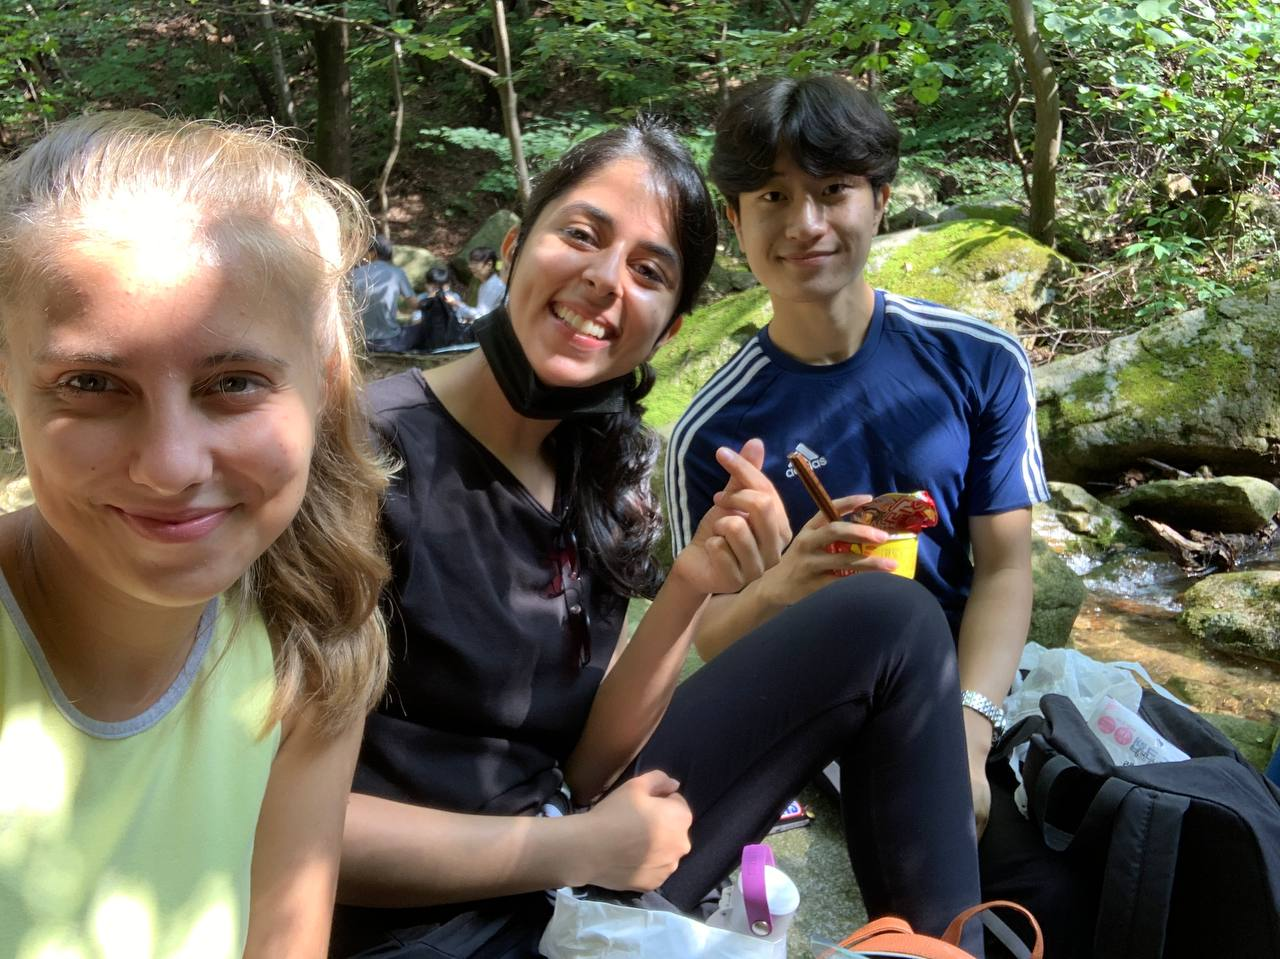

In [ ]:
from IPython.display import Image
#picture of me with my friends in Namsan mountain
Image(filename='namsan.png')

In [3]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CS 110 A day in the life of a Minervan-Final.ipynb')